Please upload an image:


Saving img_contrast.jpg to img_contrast.jpg


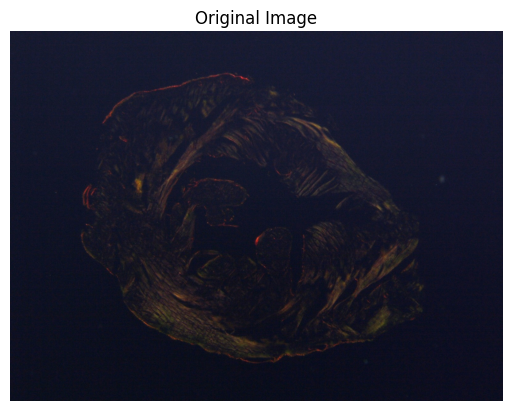

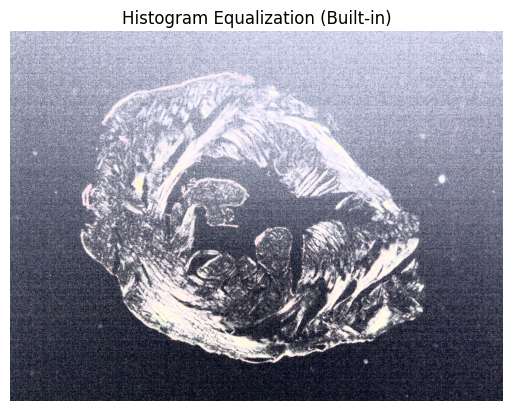

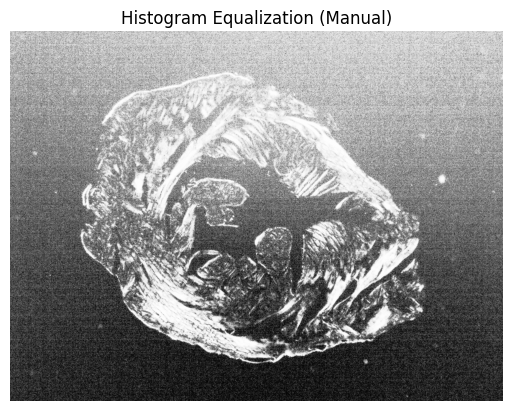

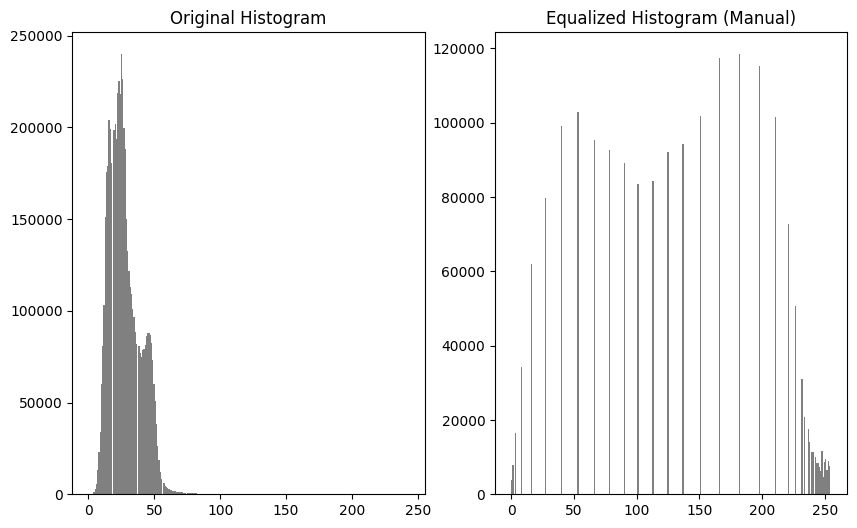

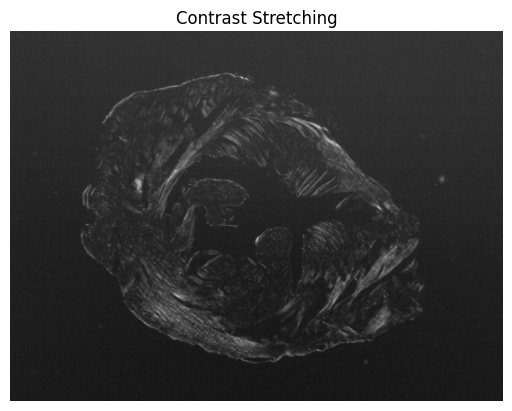

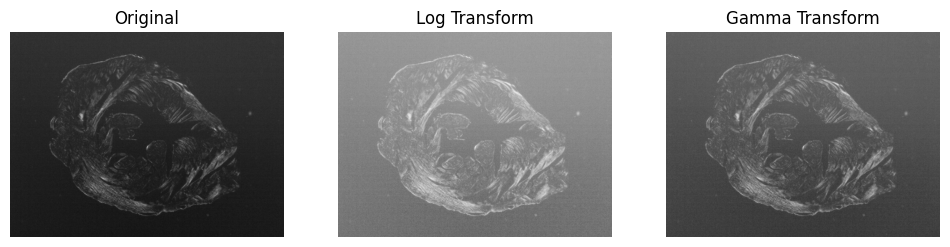

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ==============================
# IMAGE UPLOAD AT RUN TIME
# ==============================
print("Please upload an image:")
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

# Read image
image = cv2.imread(image_name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# ==============================
# BUILT-IN HISTOGRAM EQUALIZATION
# ==============================

# Convert to YCrCb color space
img_y_cr_cb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Equalize only the Y channel (luminance)
img_y_cr_cb[:, :, 0] = cv2.equalizeHist(img_y_cr_cb[:, :, 0])

# Convert back to RGB
equalized_builtin = cv2.cvtColor(img_y_cr_cb, cv2.COLOR_YCrCb2RGB)

plt.imshow(equalized_builtin)
plt.title("Histogram Equalization (Built-in)")
plt.axis('off')
plt.show()

# ==============================
# MANUAL HISTOGRAM EQUALIZATION
# ==============================
def manual_hist_equalization(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(gray.flatten(), 256, [0,256])

    # Compute CDF
    cdf = hist.cumsum()

    # Normalize CDF
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

    img_equalized = cdf_final[gray]
    return img_equalized

manual_eq = manual_hist_equalization(image)

plt.imshow(manual_eq, cmap='gray')
plt.title("Histogram Equalization (Manual)")
plt.axis('off')
plt.show()

# ==============================
# HISTOGRAM COMPARISON
# ==============================
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(image_rgb.ravel(), bins=256, color='gray')
plt.title("Original Histogram")

plt.subplot(1,2,2)
plt.hist(manual_eq.ravel(), bins=256, color='gray')
plt.title("Equalized Histogram (Manual)")
plt.show()

# ==============================
# CONTRAST STRETCHING
# ==============================
def contrast_stretching(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    r_min, r_max = np.min(gray), np.max(gray)
    stretched = ((gray - r_min) / (r_max - r_min)) * 255
    return stretched.astype(np.uint8)

contrast_img = contrast_stretching(image)

plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')
plt.show()

# ==============================
# LOG & GAMMA TRANSFORMS
# ==============================
def log_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    c = 255 / np.log(1 + np.max(gray))
    log_img = c * (np.log(1 + gray))
    return np.array(log_img, dtype=np.uint8)

def gamma_transform(img, gamma=1.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized = gray / 255.0
    gamma_corrected = np.power(normalized, gamma)
    return np.uint8(gamma_corrected * 255)

log_img = log_transform(image)
gamma_img = gamma_transform(image, gamma=0.5)

# ==============================
# DISPLAY FINAL RESULTS
# ==============================
titles = ['Original', 'Log Transform', 'Gamma Transform']
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), log_img, gamma_img]

plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
